# D213 - Advanced Data Analytics
### NLM3 Task 2: Sentiment Analysis Using Neural Networks
#### Advanced Data Analytics — D213
#### PRFA — NLM3
> André Davis
> StudentID: 010630641
> MSDA
>
> Competencies
> 4030.7.1 : Constructing Neural Networks
> The graduate builds neural networks in the context of machine-learning modeling.
> 
> 4030.7.3 : Natural Language Processing
> The graduate extracts insights from text data using effective and appropriate natural language processing (NLP) models.

##### Table of Contents

 <ul>
    <li><a href="#documentation">Documentation</a></li>
    <li><a href="#research-question">A1: Research Question</a></li>
    <li><a href="#objectives">A2: Objectives Or Goals</a></li>
    <li><a href="#neural-networks-identification">A3: Prescribed Network Neural Network Identification</a></li>
    <li><a href="#data-exploration">B1: Data Exploration</a></li>
    <li><a href="#tokenization-process">B2: Tokenization</a></li>
    <li><a href="#padding-process">B3: Padding Process</a></li> 
    <li><a href="#categories-of-sentiment">B4: Categories Of Sentiment</a></li>
    <li><a href="#data-preparation">B5: Steps To Prepare the Data</a></li>
    <li><a href="#copy-of-prepared-data">B6: Prepared Dataset</a></li>
    <li><a href="#tensorflow-model-summary">C1: Model Summary</a></li>
    <li><a href="#network-architecture">C2: Network Architecture</a></li>
    <li><a href="#hyperparameters">C3: Hyperparameters</a></li>
    <li><a href="#stopping-criteria">D1: Stopping Criteria</a></li>
    <li><a href="#fitness">D2: Fitness</a></li>
    <li><a href="#training-process">D3: Training Process</a></li>
    <li><a href="#predictive-accuracy">D4: Predictive Accuracy</a></li>
    <li><a href="#source-code">E: Code</a></li> 
    <li><a href="#functionality">H: Functionality</a></li> 
    <li><a href="#recommendations">G: Recommendeds</a></li>
    <li><a href="#reporting">H: Reporting</a></li>
    <li><a href="#code-references">I: Sources for Thirday Party Code</a></li>
    <li><a href="#source-references">J: Source References</a></li>    
  </ul>

# Documentation

 * [TensorFlow](https://www.tensorflow.org/)
 * [Keras](https://keras.io/)
     * [Dot Products](https://www.khanacademy.org/math/multivariable-calculus/thinking-about-multivariable-function/x786f2022:vectors-and-matrices/a/dot-products-mvc)    

<a id="research-question"></a>
# A1: Research Question

Is it feasible to ascertain the sentiment polarity—whether positive or negative—of an IMDb movie review to a reasonably reliable extent, solely based on the textual content of the review?

<a id="objectives"></a>
# A2: Objectives and Goals of Analysis

The main goal of this analysis is to build a neural network model that can fairly accurately tell if an IMDb movie review is positive or negative based on its text. A secondary goal is to try out different neural network setups and settings to find which one works best for our data and aim.

<a id="neural-networks-identification"></a>
# A3: Prescribed Network Neural Network Identification

> Identify an industry-relevant type of neural network that can be trained to produce useful text classification predictions on text sequences on the selected data set.

There are quite a few text-classification neural networks that can be used. Because this is a `WGU Performance Assessment` and most personal laptops don't have the computing power to perform some of the more complex neural networks without advanced GPU support [`Feedforward Neural Networks (FNN)`](https://en.wikipedia.org/wiki/Feedforward_neural_network). This is an advanced topic, and this particular neural network is known for its simplicity to implement and ability to function without higher end hardware.

It must be noted that because of its simplicity and low-resource needs, it does come with some limitations, which include:

1. Loss of neighborhood information (Suman, 2020)
2. More parameters to optimize (Suman, 2020)
3. It's not Translation invariance (Suman, 2020)

The limitations stemming from the lack of awareness regarding neighboring information preclude Feedforward Neural Networks (FNN) from effectively identifying patterns in data structures such as images, where understanding the relationship between neighboring pixels is crucial. However, in the context of text analysis for performance assessment, these limitations are not particularly detrimental.

<a id="data-exploration"></a>
# B1: Exploratory Data Analysis

In [143]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow==2.14.0


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [144]:
import inspect, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Tensor Flow Configuration
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, GlobalAveragePooling1D
from keras.models import Sequential


print(f'TensorFlow Version: {tf.__version__}')
print('\n\n')

'''
File format as presented in the readme.txt:

=======
Format:
=======
sentence \t score \n


=======
Details:
=======
Score is either 1 (for positive) or 0 (for negative)
'''
imdb_columns = ['review', 'sentiment_score']
imdb_reviews = pd.read_csv('./imdb_labelled.txt', engine='python', sep='\t+', header=None, names=imdb_columns)

TensorFlow Version: 2.14.0




In [145]:
print(imdb_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review           1000 non-null   object
 1   sentiment_score  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


In [146]:
print(imdb_reviews.head())

                                              review  sentiment_score
0  A very, very, very slow-moving, aimless movie ...                0
1  Not sure who was more lost - the flat characte...                0
2  Attempting artiness with black & white and cle...                0
3       Very little music or anything to speak of.                  0
4  The best scene in the movie was when Gerardo i...                1


In [147]:
print(imdb_reviews.describe())

       sentiment_score
count       1000.00000
mean           0.50000
std            0.50025
min            0.00000
25%            0.00000
50%            0.50000
75%            1.00000
max            1.00000


In [148]:
'''
readme.txt states that the data should contain 500 positive and 500 negative sentences, a 50/50 split.

Verifying dataset is complete
'''

total_positive_sentiments = len(imdb_reviews[imdb_reviews['sentiment_score'] == 1])
total_negative_sentiments = len(imdb_reviews[imdb_reviews['sentiment_score'] == 0])

print(f'Positive Sentiments Loaded: {total_positive_sentiments}')
print(f'Negative Sentiments Loaded: {total_negative_sentiments}')

assert total_positive_sentiments == 500, 'Failed to load all the positive sentiment scores'
assert total_negative_sentiments == 500, 'Failed to load all the negative sentiment scores'


Positive Sentiments Loaded: 500
Negative Sentiments Loaded: 500


In [149]:
'''
Check for missing values
'''
missing_data_check = imdb_reviews.isna().sum()

assert missing_data_check.review == 0, 'Reviews should not contain an missing data'
assert missing_data_check.sentiment_score == 0, 'Sentiment Scores should not contain any missing data'

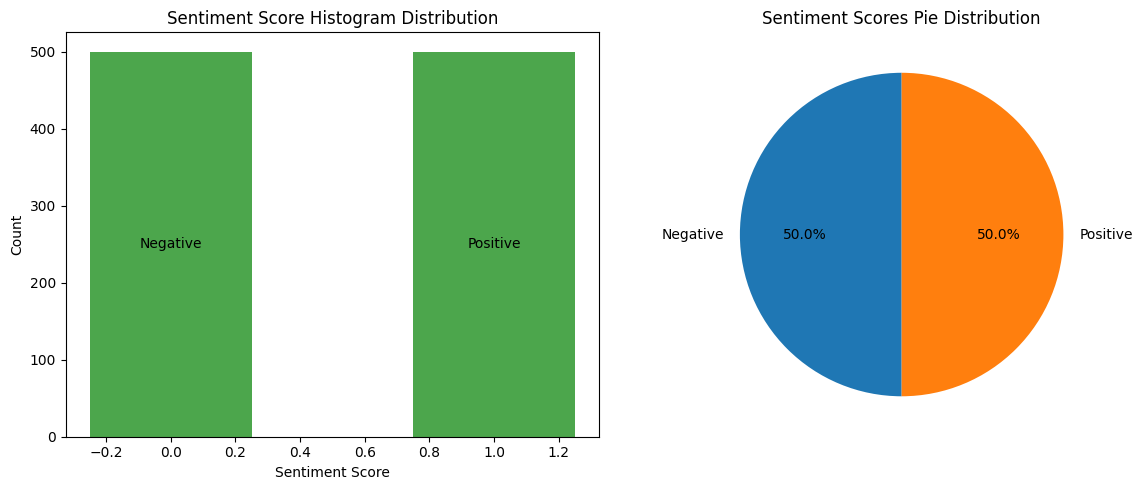

In [150]:
'''
Chart Distribution of Sentiment Score to visually check 50/50 dataset assumption.
'''

sentiment_counts = [total_negative_sentiments, total_positive_sentiments]

_, (hist_axes, pie_axis) = plt.subplots(1, 2, figsize=(12, 5))

hist_axes.hist(imdb_reviews['sentiment_score'], bins=[-.5, .5, 1.5], rwidth=.5, color='green', alpha=.7)
hist_axes.set_xlabel('Sentiment Score')
hist_axes.set_ylabel('Count')
hist_axes.set_title('Sentiment Score Histogram Distribution')

for index, sentiment_count in enumerate(sentiment_counts):
    hist_axes.text(index, (sentiment_count / 2), 'Negative' if index == 0 else 'Positive', color='black', ha='center', va='center')

pie_axis.pie(sentiment_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90)
pie_axis.set_title('Sentiment Scores Pie Distribution')

plt.tight_layout()
plt.show()

In [151]:
'''
Custom Utility functions for later activities
'''

def nameof(obj:any, g:dict=globals()) -> str:
    """
    :param obj: Any object that we want to return the string name of
    :type obj: any
     
    :param g: dictionary of globally accessible objects
    :type g: dict
    
    :return: a string representation of the objects name
    """
    return [name for name in g if g[name] is obj][0]

#test nameof function
assert nameof(mean_squared_error) ==  'mean_squared_error', 'nameof function should be returning the name of the object'

<a id="tokenization-process"></a>
# B2: Tokenization

"Tokenization is the process of breaking down a piece of text into small units called tokens. A token may be a word, part of a word or just characters like punctuation." (Perry, n.d.). For a simple example, we could end up with a text containing *"Rick and Morty go on adventures."* Then during the tokenization process ('chunking') we would potentially end up with a collection of tokens such as:

1. Rick
2. and
3. Morty
4. go
5. on
6. adventures
7. .

Take notice that the period (.) became a token as well. In the vectorization process, sometimes a text is standardized where punctuation and casing are removed.

There are many different libraries and ways to perform tokenization such as [`Natural Language Toolkit -NLTK`](https://www.nltk.org/). For the purposes of this performance assessment the [`Keras`](https://keras.io/) [`TextVectorization`](https://keras.io/api/layers/preprocessing_layers/core_preprocessing_layers/text_vectorization/) will be used.

In [152]:
'''Split the Reviews into 80%/20% training and test data.'''
train_reviews, test_reviews = train_test_split(imdb_reviews, test_size=.2, random_state=999)

total_features = 5000
out_of_vocabulary_token = '{OOV}' 

'''
To help models fail more gracefully and not ignoring sentences by using a replacement token during transformation.
Words that fall out of vocabulary are words that were not in the original training set.

Trained with "I like programming"
Tested with "I like coding" which is converted to "I like {OOV}"
'''
tokenizer = Tokenizer(num_words=total_features, oov_token=out_of_vocabulary_token)
tokenizer.fit_on_texts(train_reviews[imdb_columns[0]])

word_counts = tokenizer.word_counts
word_counts_data = json.loads(json.dumps(word_counts, indent=4))

token_df_data = {
    'Token': list(word_counts_data.keys()),
    'Count': list(word_counts_data.values())
}

trained_tokens_df = pd.DataFrame(token_df_data)
trained_tokens_df = trained_tokens_df.sort_values(by='Count', ascending=False)
print(trained_tokens_df)


           Token  Count
7            the    684
28           and    336
53             a    332
22            of    310
30            is    256
...          ...    ...
1334       pitch      1
1333       chick      1
1332  forgetting      1
1327    evaluate      1
2710   forwarded      1

[2711 rows x 2 columns]


<a id="padding-process"></a>
# B3: Padding Process

<a id="categories-of-sentiment"></a>
# B4: Categories Of Sentiment

<a id="data-preparation"></a>
# B5: Steps To Prepare the Data

<a id="copy-of-prepared-data"></a>
# B6: Prepared Dataset

<a id="tensorflow-model-summary"></a>
# C1: Model Summary

<a id="network-architecture"></a>
# C2: Network Architecture

<a id="hyperparameters"></a>
# C3: Hyperparameters


<a id="stopping-criteria"></a>
# D1: Stopping Criteria

<a id="fitness"></a>
# D2: Fitness

<a id="training-process"></a>
# D3: Training Process

<a id="predictive-accuracy"></a>
# D4: Predictive Accuracy


<a id="source-code"></a>
# E: Code

<a id="functionality"></a>
# H: Functionality

<a id="recommendations"></a>
# G: Recommendations

<a id="reporting"></a>
# H: Reporting

<a id="code-references"></a>
# I: Sources for Third Party Code

<a id="source-references"></a>
# J: Source References

 * Kotzias,Dimitrios. (2015). Sentiment Labelled Sentences. UCI Machine Learning Repository. https://doi.org/10.24432/C57604. <br /> <br />
 * Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems. <br /><br /> 
 * Suman, A. (2020, Sept). Limitation of NN and CNN. Medium. https://anjanisuman.medium.com/limitation-of-nn-and-cnn-ee21a4cdc9eb <br /> <br />
 * Tal Perry. (n.d.). What is Tokenization in Natural Language Processing? Retrieved from https://www.machinelearningplus.com/nlp/what-is-tokenization-in-natural-language-processing/